# Continued Fractions: Theory and Computation

## Introduction

Continued fractions provide a powerful representation of real numbers that reveals deep arithmetic properties often hidden in decimal expansions. A **simple continued fraction** is an expression of the form:

$$x = a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{a_3 + \cdots}}}$$

where $a_0 \in \mathbb{Z}$ and $a_i \in \mathbb{Z}^+$ for $i \geq 1$. This is compactly written as:

$$x = [a_0; a_1, a_2, a_3, \ldots]$$

## Mathematical Foundation

### Convergents

The **$n$-th convergent** $\frac{p_n}{q_n}$ is obtained by truncating the continued fraction at the $n$-th term. These convergents satisfy the recurrence relations:

$$p_n = a_n p_{n-1} + p_{n-2}, \quad q_n = a_n q_{n-1} + q_{n-2}$$

with initial conditions $p_{-1} = 1$, $p_0 = a_0$, $q_{-1} = 0$, $q_0 = 1$.

### Best Rational Approximations

A fundamental theorem states that the convergents $\frac{p_n}{q_n}$ are the **best rational approximations** to $x$ in the following sense:

$$\left| x - \frac{p_n}{q_n} \right| < \frac{1}{q_n q_{n+1}}$$

Moreover, if $\frac{p}{q}$ is any fraction with $q \leq q_n$, then:

$$\left| x - \frac{p_n}{q_n} \right| \leq \left| x - \frac{p}{q} \right|$$

### Notable Examples

- **Golden ratio**: $\phi = [1; 1, 1, 1, \ldots]$
- **Euler's number**: $e = [2; 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, \ldots]$
- **$\sqrt{2}$**: $\sqrt{2} = [1; 2, 2, 2, \ldots]$
- **$\pi$**: $\pi = [3; 7, 15, 1, 292, 1, 1, 1, 2, \ldots]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def to_continued_fraction(x, max_terms=20):
    """
    Convert a real number to its continued fraction representation.
    
    Parameters
    ----------
    x : float
        The number to convert
    max_terms : int
        Maximum number of terms to compute
    
    Returns
    -------
    list
        The continued fraction coefficients [a_0; a_1, a_2, ...]
    """
    cf = []
    for _ in range(max_terms):
        a = int(np.floor(x))
        cf.append(a)
        frac = x - a
        if abs(frac) < 1e-10:
            break
        x = 1.0 / frac
    return cf

def convergents(cf):
    """
    Compute the convergents p_n/q_n from a continued fraction.
    
    Parameters
    ----------
    cf : list
        Continued fraction coefficients
    
    Returns
    -------
    list of tuples
        List of (p_n, q_n) pairs
    """
    p_prev, p_curr = 1, cf[0]
    q_prev, q_curr = 0, 1
    result = [(p_curr, q_curr)]
    
    for a in cf[1:]:
        p_next = a * p_curr + p_prev
        q_next = a * q_curr + q_prev
        result.append((p_next, q_next))
        p_prev, p_curr = p_curr, p_next
        q_prev, q_curr = q_curr, q_next
    
    return result

def evaluate_cf(cf):
    """
    Evaluate a continued fraction to get its numerical value.
    
    Parameters
    ----------
    cf : list
        Continued fraction coefficients
    
    Returns
    -------
    float
        The value of the continued fraction
    """
    value = cf[-1]
    for a in reversed(cf[:-1]):
        value = a + 1.0 / value
    return value

## Demonstration: Continued Fractions of Classical Constants

Let us compute the continued fraction representations of several important mathematical constants and analyze their convergence properties.

In [2]:
# Define mathematical constants
constants = {
    r'$\pi$': np.pi,
    r'$e$': np.e,
    r'$\sqrt{2}$': np.sqrt(2),
    r'$\phi$': (1 + np.sqrt(5)) / 2  # Golden ratio
}

# Compute continued fractions
print("Continued Fraction Representations")
print("=" * 50)

cf_data = {}
for name, value in constants.items():
    cf = to_continued_fraction(value, max_terms=15)
    cf_data[name] = cf
    print(f"{name} = {value:.10f}")
    print(f"  CF = [{cf[0]}; {', '.join(map(str, cf[1:]))}]")
    print()

Continued Fraction Representations
$\pi$ = 3.1415926536
  CF = [3; 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 3, 3]

$e$ = 2.7182818285
  CF = [2; 1, 2, 1, 1, 4, 1, 1, 6, 1, 1, 8, 1, 1, 10]

$\sqrt{2}$ = 1.4142135624
  CF = [1; 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

$\phi$ = 1.6180339887
  CF = [1; 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



## Convergence Analysis

We now examine how rapidly the convergents approach the true value. The error is measured as:

$$\epsilon_n = \left| x - \frac{p_n}{q_n} \right|$$

For the golden ratio, which has the simplest continued fraction $[1; 1, 1, \ldots]$, the convergence is the slowest among all irrational numbers. This makes it the "most irrational" number in a precise sense.

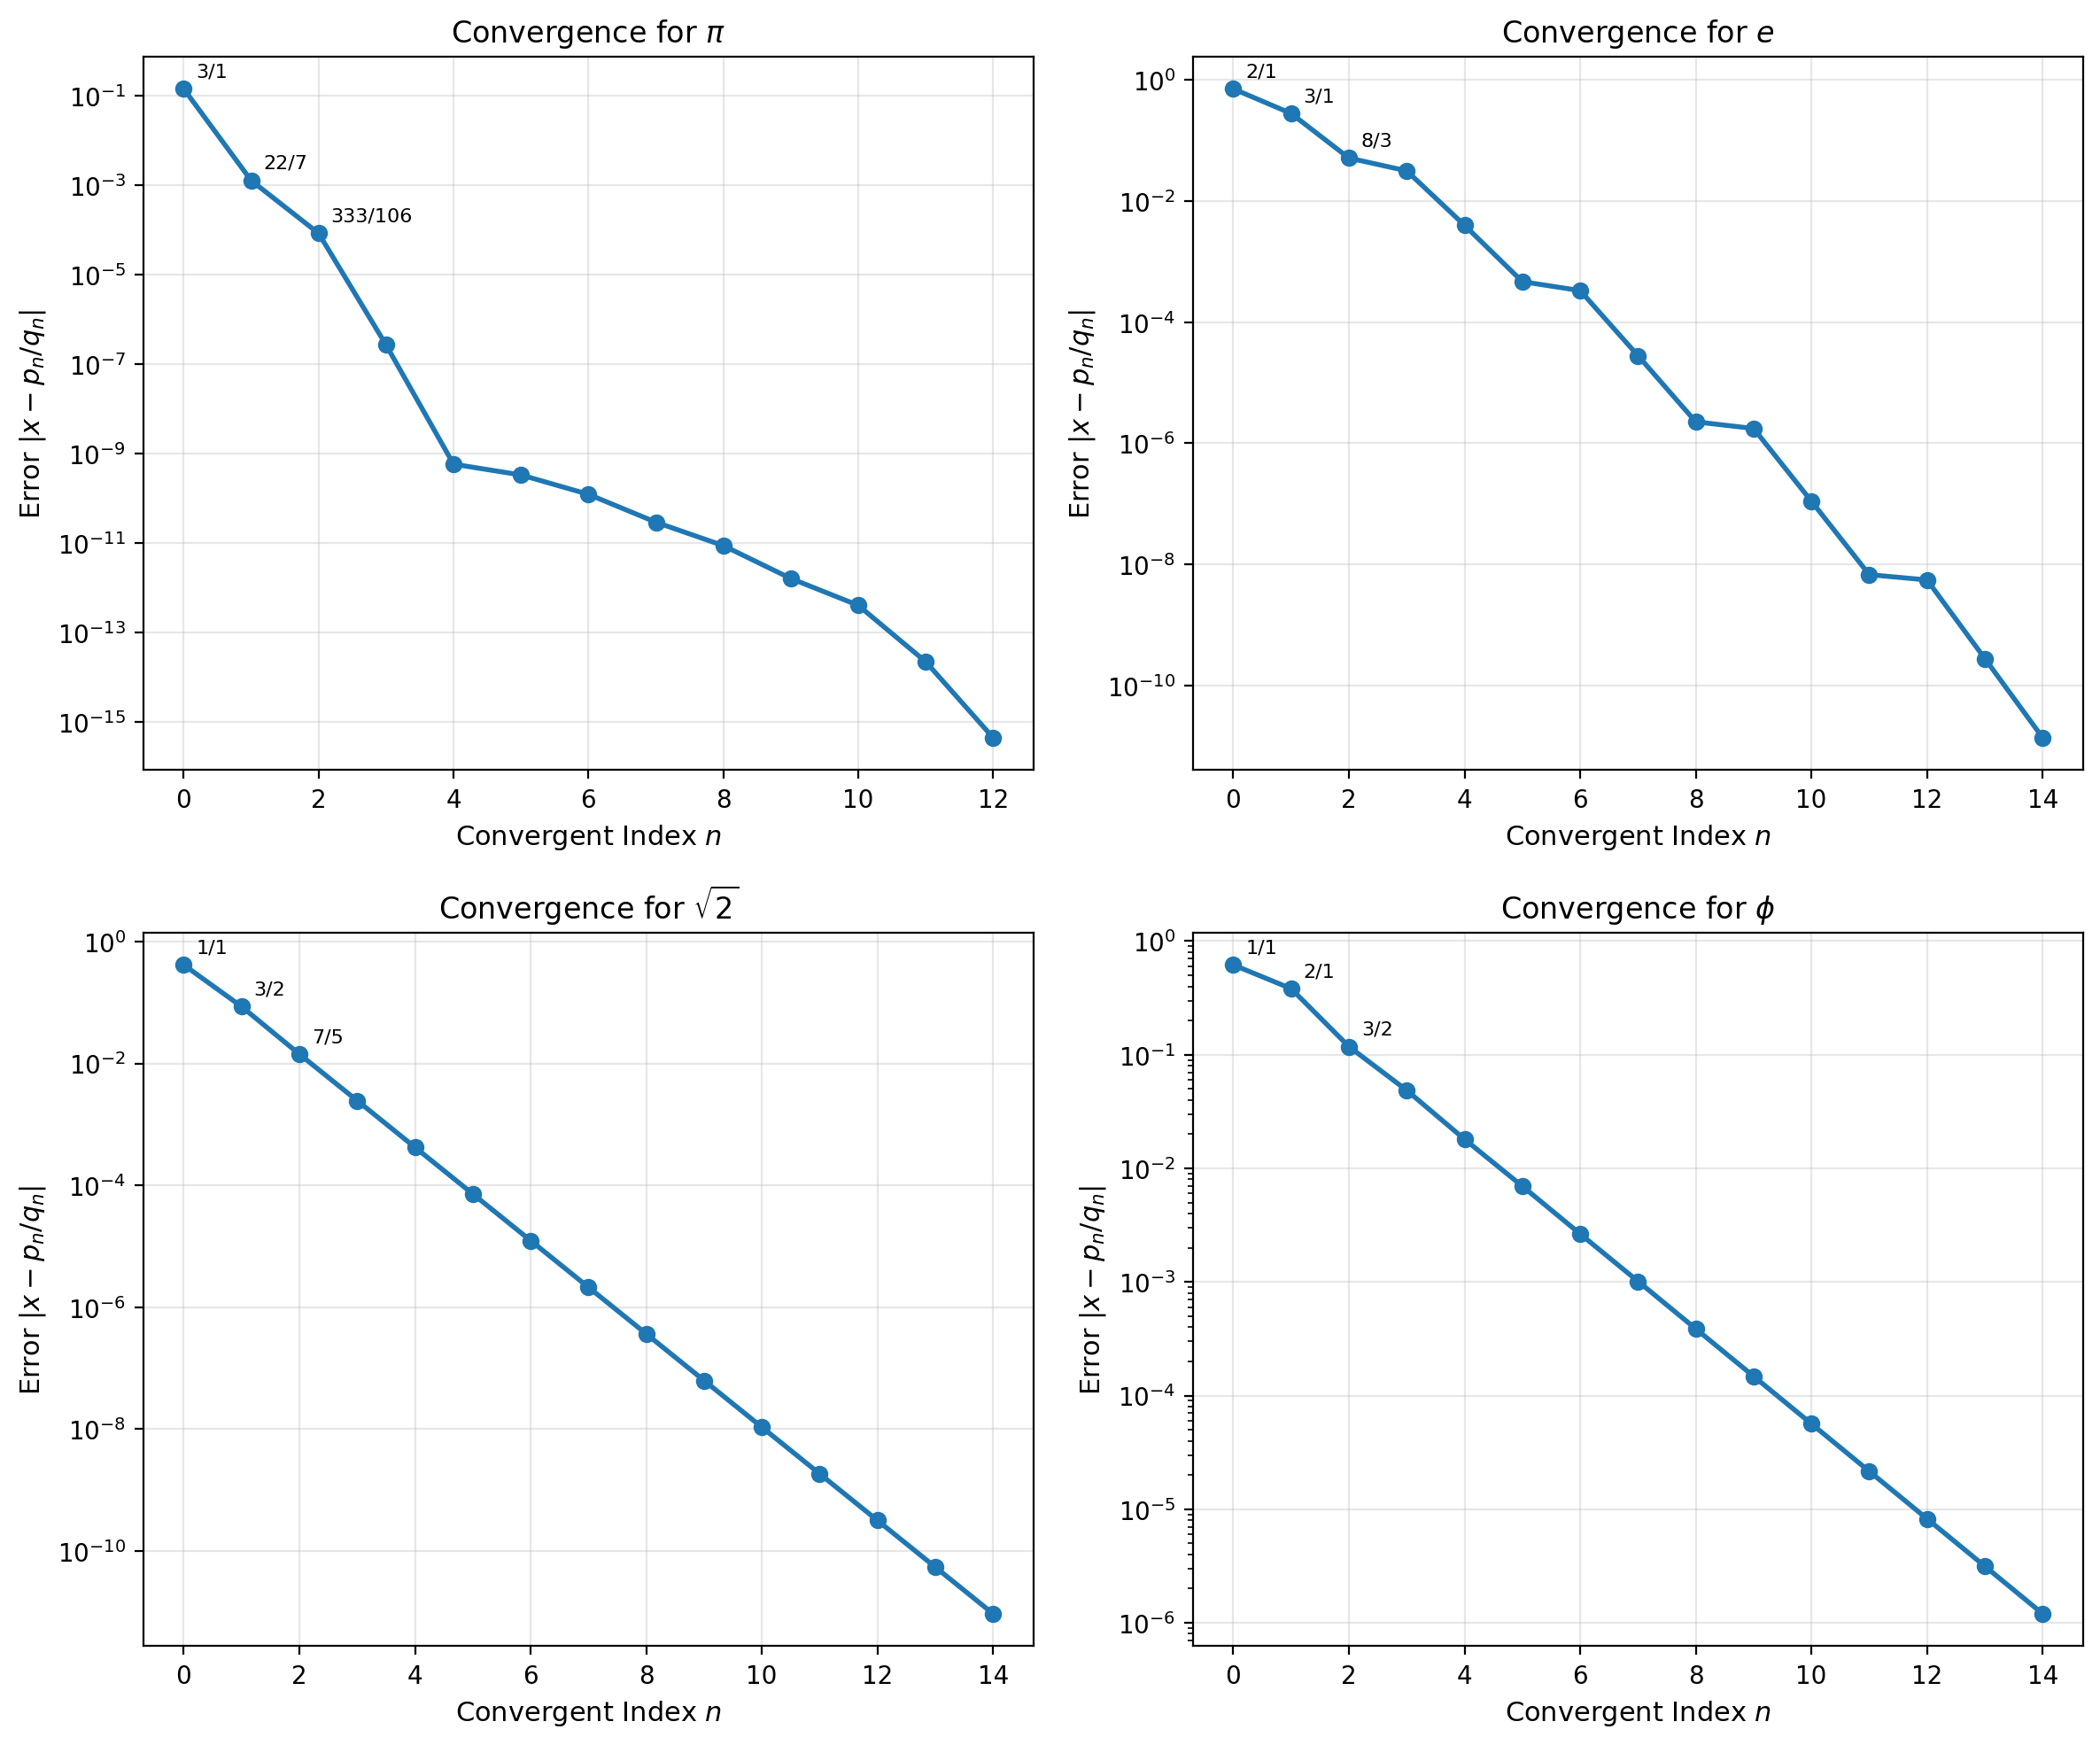

Plot saved to 'plot.png'


In [3]:
# Compute convergence rates
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, value) in enumerate(constants.items()):
    cf = cf_data[name]
    convs = convergents(cf)
    
    errors = []
    denominators = []
    
    for p, q in convs:
        error = abs(value - p/q)
        if error > 0:
            errors.append(error)
            denominators.append(q)
    
    ax = axes[idx]
    ax.semilogy(range(len(errors)), errors, 'o-', linewidth=2, markersize=6)
    ax.set_xlabel('Convergent Index $n$', fontsize=11)
    ax.set_ylabel('Error $|x - p_n/q_n|$', fontsize=11)
    ax.set_title(f'Convergence for {name}', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Annotate first few convergents
    for i in range(min(3, len(convs))):
        p, q = convs[i]
        ax.annotate(f'{p}/{q}', xy=(i, errors[i]), 
                   xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.savefig('continued_fractions_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Detailed Convergent Analysis

Let us examine the convergents of $\pi$ more closely, demonstrating the remarkable efficiency of this representation.

In [4]:
# Detailed analysis for pi
cf_pi = to_continued_fraction(np.pi, max_terms=10)
convs_pi = convergents(cf_pi)

print("Convergents of π")
print("=" * 60)
print(f"{'n':>3} {'p_n/q_n':>15} {'Value':>18} {'Error':>18}")
print("-" * 60)

for n, (p, q) in enumerate(convs_pi):
    value = p / q
    error = abs(np.pi - value)
    print(f"{n:>3} {p:>8}/{q:<6} {value:>18.15f} {error:>18.2e}")

print("\nNote: The convergent 355/113 (n=3) gives π accurate to 6 decimal places!")
print("This approximation was known to Chinese mathematician Zu Chongzhi (5th century).")

Convergents of π
  n         p_n/q_n              Value              Error
------------------------------------------------------------
  0        3/1       3.000000000000000           1.42e-01
  1       22/7       3.142857142857143           1.26e-03
  2      333/106     3.141509433962264           8.32e-05
  3      355/113     3.141592920353983           2.67e-07
  4   103993/33102   3.141592653011902           5.78e-10
  5   104348/33215   3.141592653921421           3.32e-10
  6   208341/66317   3.141592653467437           1.22e-10
  7   312689/99532   3.141592653618936           2.91e-11
  8   833719/265381  3.141592653581078           8.72e-12
  9  1146408/364913  3.141592653591404           1.61e-12

Note: The convergent 355/113 (n=3) gives π accurate to 6 decimal places!
This approximation was known to Chinese mathematician Zu Chongzhi (5th century).


## Periodic Continued Fractions and Quadratic Irrationals

A remarkable theorem due to Lagrange states that a real number has an eventually periodic continued fraction if and only if it is a quadratic irrational (a root of a quadratic equation with integer coefficients).

For example:
- $\sqrt{2} = [1; \overline{2}]$ (period 1)
- $\sqrt{3} = [1; \overline{1, 2}]$ (period 2)
- $\sqrt{5} = [2; \overline{4}]$ (period 1)

where the overline denotes the repeating part.

In [5]:
# Demonstrate periodicity for square roots
print("Continued Fractions of Square Roots")
print("=" * 50)

for n in [2, 3, 5, 7, 11, 13]:
    sqrt_n = np.sqrt(n)
    cf = to_continued_fraction(sqrt_n, max_terms=20)
    print(f"√{n} = [{cf[0]}; {', '.join(map(str, cf[1:12]))}...]")

print("\nNote the periodic patterns emerging after the first term.")

Continued Fractions of Square Roots
√2 = [1; 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...]
√3 = [1; 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1...]
√5 = [2; 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...]
√7 = [2; 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1...]
√11 = [3; 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3...]
√13 = [3; 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 1...]

Note the periodic patterns emerging after the first term.


## Conclusion

Continued fractions provide:

1. **Optimal rational approximations** - The convergents are the best possible approximations for a given denominator size
2. **Structural insights** - The pattern of coefficients reveals arithmetic properties (e.g., periodicity for quadratic irrationals)
3. **Computational efficiency** - Fast algorithms for computing approximations to irrational numbers

The theory connects to many areas including Diophantine approximation, ergodic theory, and the geometry of numbers.